## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [ ]:
import numpy as np
#import mnist
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


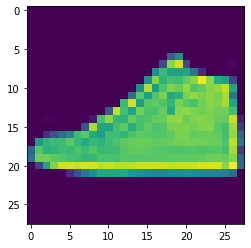

In [ ]:
plt.imshow(train_imagef[1501,:,:])
plt.show()

In [ ]:
train_labelf[:7]

array([9, 0, 0, 3, 0, 2, 7], dtype=uint8)

In [ ]:
# Normalize the images.
train_imagef = (train_imagef / 127) - 1
test_imagef = (test_imagef / 127) - 1

In [ ]:
# Flatten the images.
train_imagef = train_imagef.reshape((-1, 784))
test_imagef = test_imagef.reshape((-1, 784))

print(train_imagef.shape) # (60000, 784)
print(test_imagef.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


In [ ]:
y_t = to_categorical(train_labelf)
y_tt = to_categorical(test_labelf)

In [ ]:
results = {
    'neuron_numb': [],
    'epochs_numb': [],
    'layers_numb': [],
    'accuracy': [],
    'val_accuracy': [],
    'optimizer': [],
}

In [ ]:
# Кол-во нейронов в исходящем слое равно кол-ву классов
my_set = set(train_labelf)
my_set

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
def create_fit_model(results, layers_numb, epochs_numb, 
                     neuron_numb_list, val_optimizer):
  # Build the model.
  # neuron_numb_list = []
  model = Sequential(name='my_model')
  model.add(Dense(128, activation='relu', input_shape=(784,)))
  for k in range(layers_numb):
    # neuron_numb = 20+(10-k)*10
    # neuron_numb_list.append(neuron_numb)
    neuron_numb = neuron_numb_list[k]
    print(f'Слой {k} кол-во нейронов {neuron_numb}')
    model.add(Dense(neuron_numb, activation='tanh'))

  model.add(Dense(10, activation='softmax')) 

  # Compile the model.
  model.compile(
    optimizer = val_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

  # Train the model.
  hh = model.fit(  
    train_imagef[:,:],
    y_t[:,:],
    epochs=epochs_numb,
    batch_size=32, validation_split=0.2
  )

  # Evaluate the model.
  model.evaluate( 
    test_imagef,
    y_tt
  )

  results['neuron_numb'].append(neuron_numb_list)
  results['epochs_numb'].append(epochs_numb)
  results['layers_numb'].append(layers_numb)
  results['optimizer'].append('adam')
  results['accuracy'].append(hh.history['accuracy'][-1])
  results['val_accuracy'].append(hh.history['val_accuracy'][-1])
 
  return hh, model

In [ ]:
def test_params(params, title):
  plt.figure(figsize=(16,7))
  for index, param in params.iterrows():
    print(f'index={index}')
    hh, model = create_fit_model(results, param['layers_numb'], 
                    param['epochs_numb'], param['neuron_numb_list'],
                    param['optimizer'])
    
    plt.plot(hh.history['val_accuracy'], '-', label=f'val_{index}')
    plt.plot(hh.history['accuracy'], '--', label=f'train_{index}')

  plt.legend()
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title(title)
  plt.grid()
  plt.show()

index=0
Слой 0 кол-во нейронов 110
Слой 1 кол-во нейронов 100
Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6212 - accuracy: 0.7758 - val_loss: 0.4012 - val_accuracy: 0.8569
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3843 - accuracy: 0.8587 - val_loss: 0.3917 - val_accuracy: 0.8588
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3471 - accuracy: 0.8738 - val_loss: 0.3752 - val_accuracy: 0.8612
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3222 - accuracy: 0.8799 - val_loss: 0.3460 - val_accuracy: 0.8756
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3088 - accuracy: 0.8849 - val_loss: 0.3338 - val_accuracy: 0.8793
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2852 - accuracy: 0.8959 - val_loss: 0.3342 - val_accuracy: 0.8841
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss

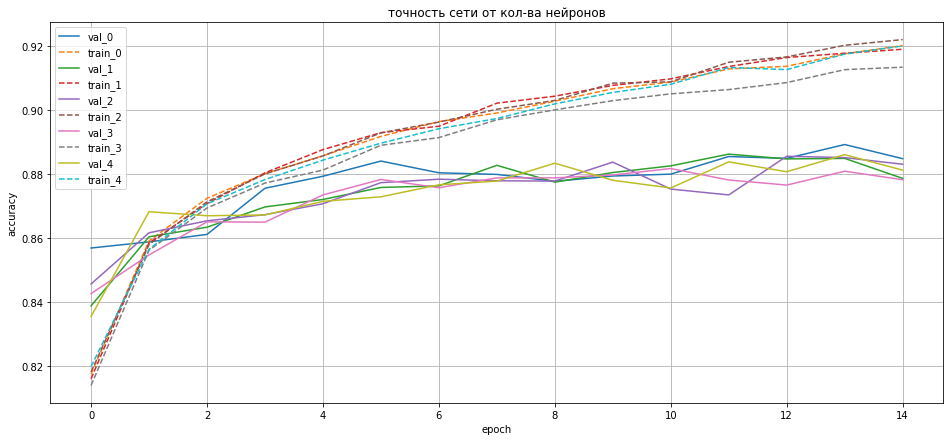

In [ ]:
params_dict = {'layers_numb': [2, 2, 2, 2, 2], 
     'epochs_numb': [15, 15, 15, 15, 15], 
     'neuron_numb_list': [
                          [110, 100], [130, 120], [140, 130], [50, 40], [75, 65]
                          ],
               'optimizer': ['adam', 'adam', 'adam', 'adam', 'adam']}
params = pd.DataFrame(data=params_dict)
test_params(params, 'точность сети от кол-ва нейронов')

index=0
Слой 0 кол-во нейронов 110
Слой 1 кол-во нейронов 100
Слой 2 кол-во нейронов 90
Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6197 - accuracy: 0.7783 - val_loss: 0.4490 - val_accuracy: 0.8402
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4016 - accuracy: 0.8524 - val_loss: 0.3743 - val_accuracy: 0.8643
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3556 - accuracy: 0.8717 - val_loss: 0.4161 - val_accuracy: 0.8519
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3330 - accuracy: 0.8772 - val_loss: 0.3540 - val_accuracy: 0.8684
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3122 - accuracy: 0.8825 - val_loss: 0.3795 - val_accuracy: 0.8599
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3005 - accuracy: 0.8905 - val_loss: 0.3474 - val_accuracy: 0.8746
Epoch 7/15
1500/1500 [==========================

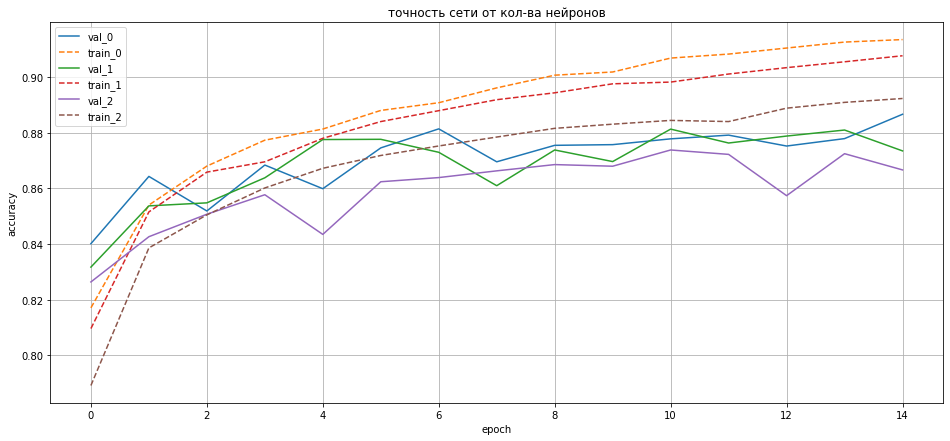

In [ ]:
params_dict = {'layers_numb': [3, 5, 10], 
     'epochs_numb': [15, 15, 15], 
     'neuron_numb_list': [
                          [110, 100, 90],
                          [110, 100, 90, 80, 70], 
                          [110, 100, 90, 80, 70, 60, 50, 40, 30, 20]
                          ],
      'optimizer': ['adam', 'adam', 'adam']}
params = pd.DataFrame(data=params_dict)
test_params(params, 'точность сети от кол-ва слоев/нейронов')

In [ ]:
# df_res_models = pd.DataFrame(data=results)
# df_res_models

In [ ]:
hh, model = create_fit_model(results, 2, 15, [110, 100])

Слой 0 кол-во нейронов 110
Слой 1 кол-во нейронов 100
Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6210 - accuracy: 0.7760 - val_loss: 0.4112 - val_accuracy: 0.8503
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3870 - accuracy: 0.8600 - val_loss: 0.3817 - val_accuracy: 0.8627
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3529 - accuracy: 0.8701 - val_loss: 0.3532 - val_accuracy: 0.8711
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3168 - accuracy: 0.8838 - val_loss: 0.3565 - val_accuracy: 0.8688
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3011 - accuracy: 0.8906 - val_loss: 0.3529 - val_accuracy: 0.8717
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2888 - accuracy: 0.8943 - val_loss: 0.3418 - val_accuracy: 0.8747
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2797

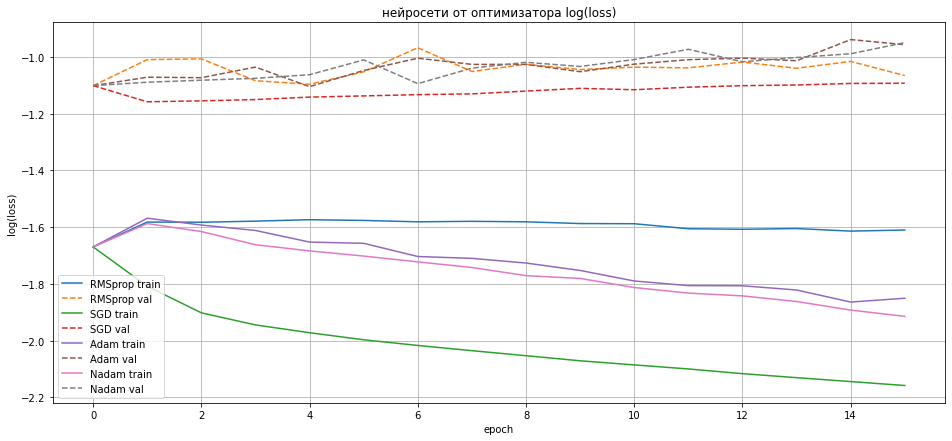

In [ ]:
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.RMSprop(), 
                keras.optimizers.SGD( ), 
                keras.optimizers.Adam( ),
                keras.optimizers.Nadam( )]:

  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(train_imagef[:48000,:], 
                           to_categorical(train_labelf[:48000]),
                           verbose = 0)
  hh0_val = modeli.evaluate(train_imagef[48000:,:], 
                            to_categorical(train_labelf[48000:]),
                            verbose = 0)
  
  # проводим обучение модели 
  hh = modeli.fit(
                  train_imagef,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch, np.log([hh0_tr[0]] + hh.history['loss']),'-',
           label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch, np.log([hh0_val[0]] + hh.history['val_loss']),'--',
           label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

index=0
Слой 0 кол-во нейронов 110
Слой 1 кол-во нейронов 100
Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6193 - accuracy: 0.7782 - val_loss: 0.4080 - val_accuracy: 0.8522
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3975 - accuracy: 0.8558 - val_loss: 0.3857 - val_accuracy: 0.8562
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3586 - accuracy: 0.8670 - val_loss: 0.3442 - val_accuracy: 0.8720
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3223 - accuracy: 0.8815 - val_loss: 0.3528 - val_accuracy: 0.8730
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3111 - accuracy: 0.8839 - val_loss: 0.3573 - val_accuracy: 0.8723
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2896 - accuracy: 0.8931 - val_loss: 0.3248 - val_accuracy: 0.8832
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss

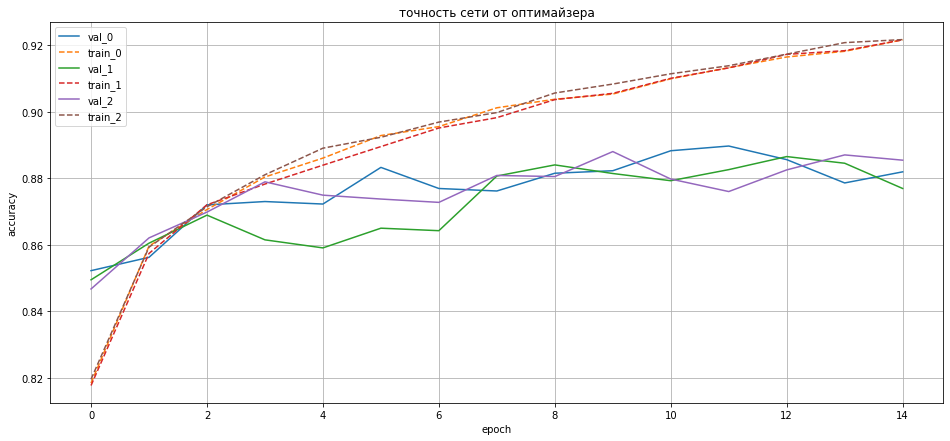

In [ ]:
params_dict = {'layers_numb': [2, 2, 2], 
     'epochs_numb': [15, 15, 15], 
     'neuron_numb_list': [
                          [110, 100],
                          [110, 100],
                          [110, 100]
                          ],
      'optimizer': ['SGD', 'RMSProp', 'Adam']}
params = pd.DataFrame(data=params_dict)
test_params(params, 'точность сети от оптимайзера')

index=0
Слой 0 кол-во нейронов 110
Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6004 - accuracy: 0.7855 - val_loss: 0.4059 - val_accuracy: 0.8537
Epoch 2/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8622 - val_loss: 0.3600 - val_accuracy: 0.8701
Epoch 3/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3391 - accuracy: 0.8730 - val_loss: 0.3620 - val_accuracy: 0.8658
Epoch 4/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3176 - accuracy: 0.8826 - val_loss: 0.3579 - val_accuracy: 0.8686
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2932 - accuracy: 0.8923 - val_loss: 0.3416 - val_accuracy: 0.8767
Epoch 6/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2775 - accuracy: 0.8964 - val_loss: 0.3365 - val_accuracy: 0.8773
Epoch 7/15
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2637 - accuracy: 0.9031

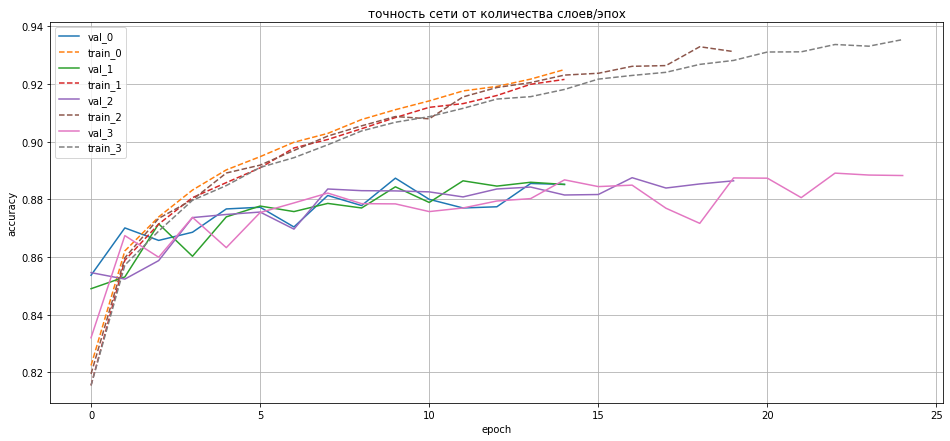

In [ ]:
params_dict = {'layers_numb': [1, 2, 2, 2], 
     'epochs_numb': [15, 15, 20, 25], 
     'neuron_numb_list': [
                          [110],
                          [110, 100],
                          [110, 100],
                          [110, 100]
                          ],
      'optimizer': ['Adam', 'Adam', 'Adam', 'Adam']}
params = pd.DataFrame(data=params_dict)
test_params(params, 'точность сети от количества слоев/эпох')

In [ ]:
hh = model.fit(
  train_imagef,
  y_t,
  epochs=3,
  batch_size=1024, validation_split=0.2
)

Epoch 1/3
47/47 [==============================] - 1s 7ms/step - loss: 0.1745 - accuracy: 0.9352 - val_loss: 0.3151 - val_accuracy: 0.8957
Epoch 2/3
47/47 [==============================] - 0s 6ms/step - loss: 0.1529 - accuracy: 0.9443 - val_loss: 0.3125 - val_accuracy: 0.8957
Epoch 3/3
47/47 [==============================] - 0s 6ms/step - loss: 0.1467 - accuracy: 0.9469 - val_loss: 0.3123 - val_accuracy: 0.8947


Сделаем анализ ошибок модели

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred = np.argmax(model.predict(test_imagef), axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
CM = confusion_matrix(test_labelf, y_pred)
print(CM)

[[856   0  12  15   1   1 106   1   8   0]
 [  5 976   0  15   1   0   2   0   1   0]
 [ 13   0 808  12  86   0  79   0   2   0]
 [ 22   9  12 900  28   2  21   0   6   0]
 [  2   0  81  32 832   0  50   0   3   0]
 [  0   0   0   0   0 958   0  28   2  12]
 [120   0  78  27  69   0 694   0  12   0]
 [  0   0   0   0   0  23   0 953   0  24]
 [  3   0   0   5   2   2  11   3 974   0]
 [  1   0   0   0   0  10   0  34   1 954]]


In [104]:
def get_precision_recall(index):
  precision = CM[index][index]/np.sum(CM[index])
  recall = CM[index][index]/np.sum([CM[itm][index] for itm in range(10) ])

  return precision, recall


precision_recall = {
    'precision': [],
    'recall': [],
}

for indx in range(10):
  precision_, recall_ = get_precision_recall(indx)
  precision_recall['precision'].append(precision_)
  precision_recall['recall'].append(recall_)


In [85]:
CM

array([[856,   0,  12,  15,   1,   1, 106,   1,   8,   0],
       [  5, 976,   0,  15,   1,   0,   2,   0,   1,   0],
       [ 13,   0, 808,  12,  86,   0,  79,   0,   2,   0],
       [ 22,   9,  12, 900,  28,   2,  21,   0,   6,   0],
       [  2,   0,  81,  32, 832,   0,  50,   0,   3,   0],
       [  0,   0,   0,   0,   0, 958,   0,  28,   2,  12],
       [120,   0,  78,  27,  69,   0, 694,   0,  12,   0],
       [  0,   0,   0,   0,   0,  23,   0, 953,   0,  24],
       [  3,   0,   0,   5,   2,   2,  11,   3, 974,   0],
       [  1,   0,   0,   0,   0,  10,   0,  34,   1, 954]])

In [82]:
CM[0]

array([856,   0,  12,  15,   1,   1, 106,   1,   8,   0])

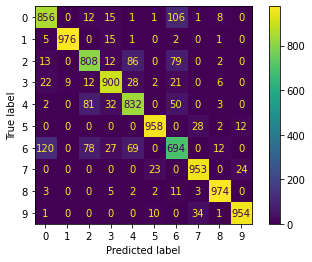

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot(values_format ='.3g')
plt.show()

#Ответ:

1. * Оптимальной по val_accuracy оказалась модель с 110 на 100 нейронов в 2х скрытых слоях. Хотя остальные рез-ты рядом

  * Увеличение кол-ва слоев при том же количестве эпох только ухудшает рез-ты модели, как и при решении первого ДЗ напрашивается вывод что увеличивать нужно параллельно и кол-во эпох.

2. Adam явно выигрывает, рядом с ним Nadam

3. Увеличение кол-ва эпох положительно влияет на рез-ты, положительно повлияло повторное обучение с измененными batch_size

4. Больше всего ошибок у 6го класса, самая большая путает 6ой и 0ой
Как видим из рез-ов ниже по качеству и полноте хуже всех показывает 6ой класс

In [105]:
# Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.
df_res_precision_recall= pd.DataFrame(data=precision_recall)
df_res_precision_recall

,precision,recall
0,0.856,0.837573
1,0.976,0.990863
2,0.808,0.815338
3,0.900,0.894632
4,0.832,0.816487
5,0.958,0.961847
6,0.694,0.720665
7,0.953,0.935231
8,0.974,0.965312
9,0.954,0.963636


In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(test_imagef[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labelf[:5]) #

[9 2 1 1 6]
[9 2 1 1 6]


Сохраним модель на диск

In [ ]:
# сохранить веса модели.
model.save_weights('model.h5')

# загрузить веса модели:
# model.load_weights('model.h5')

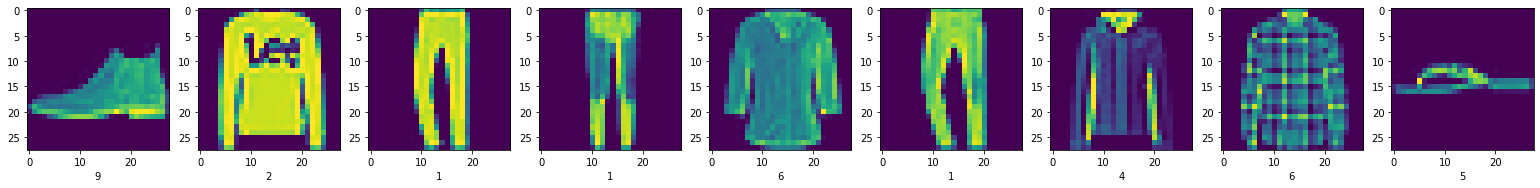

In [ ]:
N = 9
y_pred = model.predict(test_imagef[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_imagef[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show() 

In [ ]:
test_labelf[:N]

array([9, 2, 1, 1, 6, 1, 4, 6, 5], dtype=uint8)